## Implementing a Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [4]:
np.max(a)

6

In [5]:
# The network parameters are stored in the instance variable self.params where keys are string parameter naes and values are numpy arrays.
# Create a small net and some toy data to check your implementation
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

In [6]:
net = init_toy_model()
X, y = init_toy_data()

In [7]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-0.81233741, -1.27654624, -0.70335995],
    [-0.17129677, -1.18803311, -0.47310444],
    [-0.51590475, -1.01354314, -0.8504215 ],
    [-0.15419291, -0.48629638, -0.52901952],
    [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]



In [8]:
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Difference between your scores and correct scores:
3.68027209324e-08


## Forward pass: compute loss

In [9]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.3
print('difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

difference between your loss and correct loss:
0.00378789132982


## Backward pass

In [10]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass
# If your implementation is correct, the difference between the numeric and analytic gradients should be less than 1e-8 for each of W1, W2, b1 and b2
loss, grads = net.loss(X, y, reg=0.05)

# These should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print("%s max relative error: %e" % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09


## Train the network

In [12]:
net = init_toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, reg=5e-6, num_iters=100, verbose=False)
print("Final training loss: ", stats['loss_history'][-1])
print(stats)

Final training loss:  0.0156350483449
{'loss_history': [1.2658608452019746, 0.8927632732415044, 0.71459580256995248, 0.56234548042464561, 0.426658946720753, 0.31384790058409578, 0.23239639542824661, 0.17715226110048798, 0.13952363242221957, 0.11295731400496065, 0.093978492630594324, 0.079739681418597927, 0.069098152476105693, 0.060933267566630617, 0.054553129750837273, 0.049443188077040262, 0.045304017711145846, 0.041881044792273482, 0.039011834095468781, 0.036577079241662716, 0.034493036692459941, 0.03269353478779434, 0.031129905295158414, 0.029757696842335556, 0.028547476247688938, 0.027474306448517501, 0.026518161480792866, 0.02566283061510128, 0.024892657573973576, 0.02419749793461369, 0.023567849394727603, 0.022995919850622118, 0.022475167111624686, 0.021998659680324269, 0.021562139050909365, 0.021161328491714711, 0.020792658630651814, 0.020453055793630295, 0.020138971892537119, 0.019848374026958202, 0.019579080673503946, 0.019329258910207196, 0.019097285215857334, 0.0188811583205

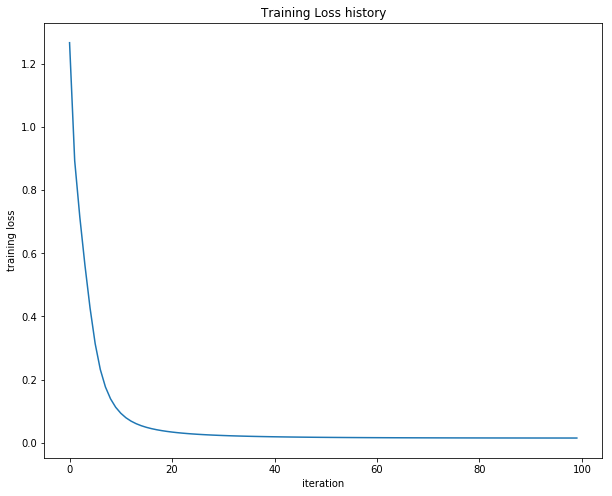

In [13]:
# Plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Load the data

In [14]:
from cs231n.data_utils import load_CIFAR10

In [15]:
def get_CIFAR10_data(num_training = 49000, num_validation = 1000, num_test = 1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare it
    for the two-layer neural net classifier. These are the same steps as we
    used for the SVM, but condensed to a single function
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/mnt/56EA7396EA7370DB/source/u_stanford/cs231_lightaime/assignment1/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    std_data = np.std(X_train, axis = 0, keepdims = True)
    X_train /= std_data
    X_val /= std_data
    X_test /= std_data
    
    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [16]:
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


## Train a network

In [111]:
learning_rate = [0.001, 0.005]
learning_rate_decay = [0.80, 0.90]

range_lr = np.linspace(learning_rate[0], learning_rate[1], 5)
range_lr_decay = np.linspace(learning_rate_decay[0], learning_rate_decay[1], 11)
range_lr_decay
best_val = -1
results = {}
best_lr = 0
best_lr_decay = 0

In [17]:
# To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning
# rate schedule and optimization proceeds; after epoch, we will reduce the learning rate by multiplying it by a decay rate
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network

stats = net.train(X_train, y_train, X_val, y_val,
                 num_iters = 1000, batch_size =200,
                 learning_rate = 0.001, learning_rate_decay = 0.85,
                 reg = 0.25, verbose = True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
# results[(lr, lr_decay)] = val_acc
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302945
iteration 200 / 1000: loss 2.302884
iteration 300 / 1000: loss 2.302897
iteration 400 / 1000: loss 2.302848
iteration 500 / 1000: loss 2.302838
iteration 600 / 1000: loss 2.302850
iteration 700 / 1000: loss 2.302840
iteration 800 / 1000: loss 2.302787
iteration 900 / 1000: loss 2.302742


NameError: name 'results' is not defined

In [112]:
# To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning
# rate schedule and optimization proceeds; after epoch, we will reduce the learning rate by multiplying it by a decay rate
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
for lr in range_lr:
    for lr_decay in range_lr_decay:
        stats = net.train(X_train, y_train, X_val, y_val,
                         num_iters = 1000, batch_size =200,
                         learning_rate = lr, learning_rate_decay = lr_decay,
                         reg = 0.25, verbose = True)

        # Predict on the validation set
        val_acc = (net.predict(X_val) == y_val).mean()
        results[(lr, lr_decay)] = val_acc
        print('Validation accuracy: ', val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_lr = lr
            best_lr_decay = lr_decay
print("lr: %f, lr decay: %f have best accuracy: %f" % (best_lr, best_lr_decay, best_val))

iteration 0 / 1000: loss 2.302977
iteration 100 / 1000: loss 1.984004
iteration 200 / 1000: loss 1.881953
iteration 300 / 1000: loss 1.695444
iteration 400 / 1000: loss 1.711149
iteration 500 / 1000: loss 1.710879
iteration 600 / 1000: loss 1.613810
iteration 700 / 1000: loss 1.596915
iteration 800 / 1000: loss 1.617071
iteration 900 / 1000: loss 1.607440
Validation accuracy:  0.458
iteration 0 / 1000: loss 1.544446
iteration 100 / 1000: loss 1.587342
iteration 200 / 1000: loss 1.618360
iteration 300 / 1000: loss 1.532053
iteration 400 / 1000: loss 1.488957
iteration 500 / 1000: loss 1.524498
iteration 600 / 1000: loss 1.418369
iteration 700 / 1000: loss 1.410535
iteration 800 / 1000: loss 1.490382
iteration 900 / 1000: loss 1.449757
Validation accuracy:  0.487
iteration 0 / 1000: loss 1.394410
iteration 100 / 1000: loss 1.483474
iteration 200 / 1000: loss 1.491932
iteration 300 / 1000: loss 1.523445
iteration 400 / 1000: loss 1.470526
iteration 500 / 1000: loss 1.376060
iteration 600 

iteration 300 / 1000: loss 1.457237
iteration 400 / 1000: loss 1.548742
iteration 500 / 1000: loss 1.375372
iteration 600 / 1000: loss 1.508699
iteration 700 / 1000: loss 1.426968
iteration 800 / 1000: loss 1.518500
iteration 900 / 1000: loss 1.595215
Validation accuracy:  0.503
iteration 0 / 1000: loss 1.372806
iteration 100 / 1000: loss 1.741487
iteration 200 / 1000: loss 1.553229
iteration 300 / 1000: loss 1.794187
iteration 400 / 1000: loss 1.602140
iteration 500 / 1000: loss 1.505232
iteration 600 / 1000: loss 1.592389
iteration 700 / 1000: loss 1.450431
iteration 800 / 1000: loss 1.487043
iteration 900 / 1000: loss 1.478127
Validation accuracy:  0.494
iteration 0 / 1000: loss 1.462087
iteration 100 / 1000: loss 1.826242
iteration 200 / 1000: loss 1.743685
iteration 300 / 1000: loss 1.586614
iteration 400 / 1000: loss 1.630486
iteration 500 / 1000: loss 1.648426
iteration 600 / 1000: loss 1.449247
iteration 700 / 1000: loss 1.761052
iteration 800 / 1000: loss 1.382761
iteration 90

iteration 700 / 1000: loss 32791415543594942973316248044637529907261244753506206505658228769061345798757147434814955882864574531453599589016818039399030802350080.000000
iteration 800 / 1000: loss 7638870880810753717750199875359377023993949345602898008714563503778315319504048612727972463851503699721438181027839492585761496104960.000000
iteration 900 / 1000: loss 5113561532541926205730147451984726444934426498556910219882825805196146465939540956169612520059373239116923463760911947681822683430912.000000
Validation accuracy:  0.275
iteration 0 / 1000: loss 2246731990129944649480389004948215693194093452992872044451403618914878595066866462013737521588765078349985199196434069461276492300288.000000
iteration 100 / 1000: loss 51011930531725242154932040256324559457339054426232118315308317039677245824468842100177475742617336809697123001363540369817659745643342719877120.000000
iteration 200 / 1000: loss 343730634877091600301409664239985087012840086079208042982104988607254499917474472687866591836783

iteration 100 / 1000: loss 84440227276094061924632593436746010666581477294800099320020560482837398493134839602117587031156094825956662003370053195343765699159104988477003374703697380410105833490747435418175712458655701783601962238136535525674140510443607309427647535729322540616740286068148765525841309589559050240.000000
iteration 200 / 1000: loss 85087001160520628997272689653614009791185410757466010287865812589186769697135304654974783173965046250457465727564070303072328172908595166793251509838389555630239658199714556294764791343615612797880982950364349098256075506019437396430317354267325532142864316126518379542628646786324944704235334560382976.000000


/home/damvantai/Dropbox/source/courses/CS231n Convolutional Neural Networks for Visual Recognition/assignment-1/cs231n/classifiers/neural_net.py:111: RuntimeWarning: overflow encountered in subtract
  shift_scores = scores - np.max(scores, axis=1)[..., np.newaxis]
/home/damvantai/Dropbox/source/courses/CS231n Convolutional Neural Networks for Visual Recognition/assignment-1/cs231n/classifiers/neural_net.py:111: RuntimeWarning: invalid value encountered in subtract
  shift_scores = scores - np.max(scores, axis=1)[..., np.newaxis]
/home/damvantai/Dropbox/source/courses/CS231n Convolutional Neural Networks for Visual Recognition/assignment-1/cs231n/classifiers/neural_net.py:85: RuntimeWarning: invalid value encountered in less
  relu_1_activation[relu_1_activation < 0] = 0
/home/damvantai/Dropbox/source/courses/CS231n Convolutional Neural Networks for Visual Recognition/assignment-1/cs231n/classifiers/neural_net.py:153: RuntimeWarning: invalid value encountered in greater
  relu_mask = (r

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087
iteration 0 / 1000: loss nan
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087
iteration 0 / 1000: loss nan
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087
iteration 0 / 1000: loss nan
iteration 100 / 1000: loss nan
iteration 200 / 1000: l

## Debug the training

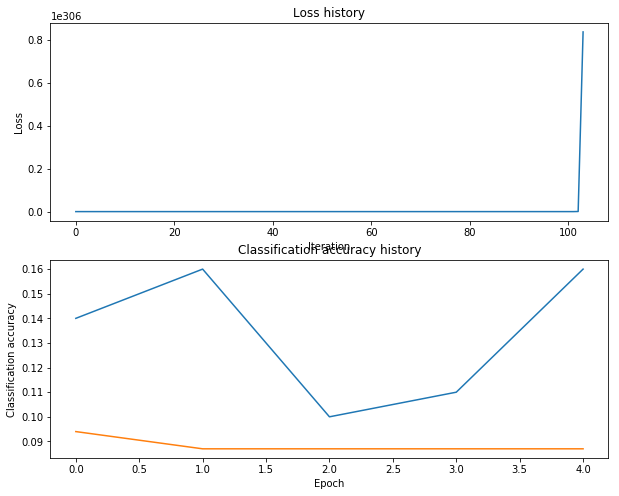

In [94]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

In [95]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
#     W1 = W1.reshape(32, 32, 3, -1)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

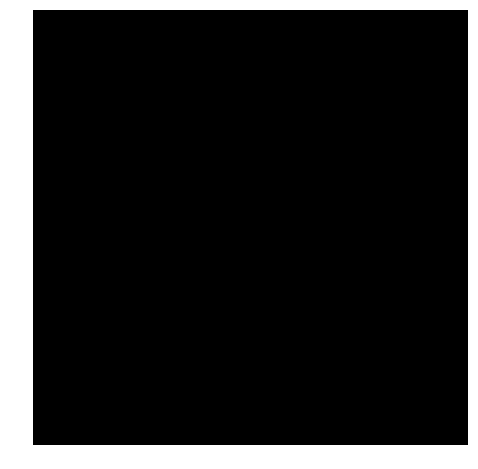

In [96]:
show_net_weights(net)

In [126]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
                 num_iters = 1000, batch_size = 200,
                 learning_rate = 0.003, learning_rate_decay = 0.82,
                 reg = 0.25, verbose = True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

bestNet = net

iteration 0 / 1000: loss 2.303317
iteration 100 / 1000: loss 1.805106
iteration 200 / 1000: loss 1.701021
iteration 300 / 1000: loss 1.588498
iteration 400 / 1000: loss 1.606395
iteration 500 / 1000: loss 1.396059
iteration 600 / 1000: loss 1.702454
iteration 700 / 1000: loss 1.538003
iteration 800 / 1000: loss 1.327283
iteration 900 / 1000: loss 1.376713
Validation accuracy:  0.513


In [127]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.498


In [113]:
results

{(0.001, 0.80000000000000004): 0.45800000000000002,
 (0.001, 0.81000000000000005): 0.48699999999999999,
 (0.001, 0.82000000000000006): 0.51600000000000001,
 (0.001, 0.83000000000000007): 0.52000000000000002,
 (0.001, 0.84000000000000008): 0.52800000000000002,
 (0.001, 0.85000000000000009): 0.53300000000000003,
 (0.001, 0.85999999999999999): 0.51700000000000002,
 (0.001, 0.87): 0.51900000000000002,
 (0.001, 0.88): 0.51600000000000001,
 (0.001, 0.89000000000000001): 0.51300000000000001,
 (0.001, 0.90000000000000002): 0.51600000000000001,
 (0.002, 0.80000000000000004): 0.51700000000000002,
 (0.002, 0.81000000000000005): 0.51100000000000001,
 (0.002, 0.82000000000000006): 0.51700000000000002,
 (0.002, 0.83000000000000007): 0.51500000000000001,
 (0.002, 0.84000000000000008): 0.51400000000000001,
 (0.002, 0.85000000000000009): 0.50700000000000001,
 (0.002, 0.85999999999999999): 0.52000000000000002,
 (0.002, 0.87): 0.496,
 (0.002, 0.88): 0.504,
 (0.002, 0.89000000000000001): 0.528000000000000

## Neural_net.py

In [29]:
num_train = X_train.shape[0]

In [30]:
num_train

49000

In [31]:
batch_size = 200

In [32]:
iterations_per_epoch = max(num_train / batch_size, 1)

In [33]:
loss_history = []
train_acc_history = []
val_acc_history = []

In [34]:
num_iters = 100

In [43]:
for it in range(num_iters):
    X_batch = None
    y_batch = None
    
    random_batch = np.random.permutation(num_train)[0:batch_size]
    print(random_batch)
    X_batch = X_train[random_batch, ...]
    print("size X_train: ", X_train.shape)
    print("X random batch", X_batch)
    

[ 3896 23022  2902  6583 11423 26039   349  5196 11103 10201 14097  1526
 14988  4046 22018 20418 22643 47743  8456  9889 23410  4741 13030 45479
  9626 48194 24612  1341 25704  1090 15472 17821 48813 13780 13824 46897
 30891 30505  5141  6335 48510 46342  5385 18440 20984 45975 17439  1974
 28115  6756   685  9668 33617 47236 18503 25786 44893 34456  9320 24420
 41150 11370 22035 29679 37360 12870 38430 20826  3938 43434  7412 41599
 19468 20080  5534 38674  8200 18652 39151 42869 33789 48528 38811 41177
 45852 27766 26119 25925 10401 20347 23887 11690  1068 41434 27605 27149
 28445 47623 48105  1135 13216 39809  9855 22357 27066  8575 27235 29253
 22188 13735 17780 16753   831 23632 32770 39555 28300 20723 12237 46657
 47246 24182  7911 36084 48433 22990  2032  2567 13424 23273 47582 25429
 29011  3721 10566   557 25365  7039 40157 18383   281 44421  6523 15007
  1210 14716 36152 34253 39633 25419 30360 43500 34507 15342 43838 14987
 20173 25887 26631  3060 43908 38721 21347 13577  9

size X_train:  (49000, 3072)
X random batch [[ -95.64189796  -95.98173469  -86.47391837 ...,  -12.64218367
   -32.86195918  -62.39957143]
 [  83.35810204   72.01826531   70.52608163 ...,   56.35781633
    44.13804082   52.60042857]
 [ -74.64189796  -59.98173469  -65.47391837 ...,  -50.64218367
   -28.86195918  -62.39957143]
 ..., 
 [  58.35810204   97.01826531  119.52608163 ...,  -29.64218367
   -13.86195918    4.60042857]
 [  84.35810204   30.01826531   -1.47391837 ...,   43.35781633
     7.13804082  -16.39957143]
 [ -34.64189796  -47.98173469  -10.47391837 ...,   20.35781633
    24.13804082   48.60042857]]
[15344  6889 35956 24579 39272 35805 19707 28571  1450 45454 20033 29292
 23573  8012 43083 37553 24102 44428 11613 41780 36843   644  8173  7695
 48375 24156 23368 35197 36464 45093 23307 20696 41554 11631 46511 17522
  2492 20436 25036 43143 37323 29529 22872 38577 17904 16161  9377 12291
  9751  2711 13186  2303 39740 38580 43669  1180 20399 19391  2909 30338
 43096 40104 34121 

[13942 38157 48753 26742 41262 40301 33836  6085 22319 42699  2753 24484
 47798  8783  1911 34174 21017  1339 31079 10319 22666 28862    31  8190
 18003 21663  7365 12789 11614 23057 45414 36732  2005  6621  4575 12550
  7338 35769 33103 41290 22412 26804 44243 30129 16727 17428 19762 40037
 29692 26473 33120 46903 44281 12294  6286  4755  5065 29001  2311 27393
 10056 33417 22063 44462   788 39459 19920 14553 44203 19985  3874 37423
 33723 26131 15147  6482 13805 28967 19475 45910 21999 37210 13248 27887
 39923 48882 35496 19096 12334 39882  3229 11218 33407 34748  1133 30845
 19868 19882 27605 19560 41582 37925 29799 23095 40574 42321 43649 13989
 40308 28409 46381 10693  4850 21852 26082 35305 11291 21550 37364 24273
 18968 15915 46950 21495  5409 24254 10339 12278 29680 16568 15908 31558
 10335 25205  9981 36071 36691 39747 32735 41884  5035 35444 33309 27600
  9471 16148 46681 26638   945 16105 27367 33459 44554 46945  2153 12832
  8433 24987 26851 18738 45077  6439  3365 45309 17

[40784 48052 14552 42497 17944 24676  5367 12039 47224 35213 36776 45901
 47864 10158 38106  2739 31063 32097 18579 16327 39444 29969  6516 26598
 22365 21432  7333 16731 48281 42839 29946 13786  1987 18961 31603 36917
  1366 44304  8031 17086  4028 45704  7835 33831 20011 11482 29012  2256
  1519 43546 17529  7404 13433 17916  5328 47608 33886 12877 21582  8844
 44466 19990 14841 26674 37275  6049 15188 46767  9071 29846 28502 32396
 34834 19521   524 40702 13475 13903 42510 40025 46513 24301  5967 37854
   372 13501 44668 46931 13734 39226  3015 17431  5606 14829 28085 41881
   853 39500 12524 23194 44017 17417 23206 28893 14051 18630 25358 10380
 40836 24295 10320 32559  9918 27241 33721 26957 27892 10829 27520 14656
 38818 25880  8084 37640 21776  5185 45624 38215 34314 35603  5094 27664
 20153 20892 14498 45094  4934 14521 20992 18764 19202 32041 35540 40833
 21811 13858 34010 37376 24855 46396 24845 17992  3228   314 44233  3302
 25300 18706 12111  9976 40987 33248 44263 14487 28

size X_train:  (49000, 3072)
X random batch [[ -38.64189796    4.01826531   52.52608163 ...,  -69.64218367
   -58.86195918  -22.39957143]
 [  63.35810204   45.01826531   37.52608163 ...,   73.35781633
    61.13804082   57.60042857]
 [   6.35810204   17.01826531   10.52608163 ...,   -6.64218367
   -20.86195918    3.60042857]
 ..., 
 [ -70.64189796    2.01826531  -95.47391837 ..., -113.64218367
   -70.86195918 -108.39957143]
 [   9.35810204   -2.98173469  -27.47391837 ...,  -18.64218367
   -26.86195918  -37.39957143]
 [ -77.64189796  -27.98173469    5.52608163 ..., -105.64218367
   -77.86195918  -54.39957143]]
[20196 33652  1867 40179  9322  5324 33138 37254 12783  5203 12911 37284
 11647 17411  9380 11977 35223  7587 18686 45623 23309  9237 16830 17726
  9961 30571   983 16429 39019  3454 47686   655 21147 10432 26560 34847
 35660 41188 26668  2998 38803 48070 42509 39616 34993 17345 23807  8416
 13835 16322 35761 25549 32460 39816  5508 41849  1643 19041 19359  1515
  2500  7315 20435 

In [24]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [25]:
np.random.permutation(a)

array([[4, 5, 6],
       [1, 2, 3]])

In [26]:
X_batch = []
X_batch = X_batch[a, ...]

TypeError: list indices must be integers or slices, not tuple

In [41]:
np.random.permutation(49000)

array([ 8545, 30868, 45856, ..., 36448, 29989, 19952])

In [45]:
print(X_train[3896])

[ 16.35810204  13.01826531   5.52608163 ..., -20.64218367  -9.86195918
 -25.39957143]


In [77]:
print(a.transpose(0, 1))

[[1 2 3]
 [4 5 6]]


In [81]:
b = np.array([[[1,2,3]], [[4, 5, 6]]])

In [86]:
b.transpose(2, 0, 1)

array([[[1],
        [4]],

       [[2],
        [5]],

       [[3],
        [6]]])